In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [3]:
# There are 14 columns:

# age. The age of the patient.
# sex. The gender of the patient. (1 = male, 0 = female).
# cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
# trestbps. Resting blood pressure in mmHg.
# chol. Serum Cholestero in mg/dl.
# fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
# restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
# thalach. Max heart rate achieved.
# exang. Exercise induced angina (1 = yes, 0 = no).
# oldpeak. ST depression induced by exercise relative to rest.
# slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
# ca. Number of major vessels (0–3) colored by flourosopy.
# thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
# num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

### data cleaning

In [4]:
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

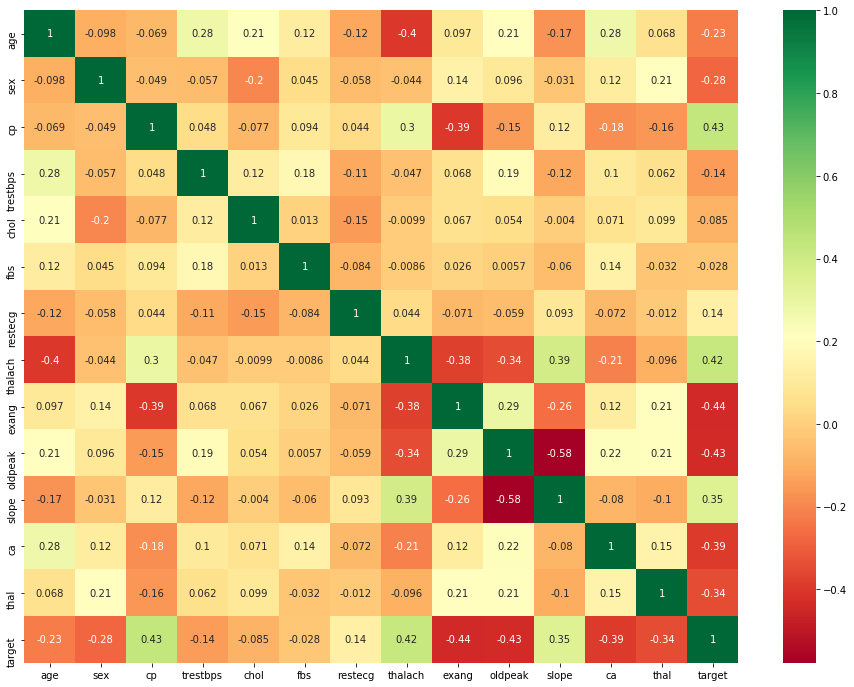

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### data processing

encode some columns such as the CP column <br>
these are categorical data so need to encode them

In [9]:
X = data.drop(['target'], axis=1)
Y = data.target

# encode the categorical columns
X = pd.get_dummies(X, columns=['sex','cp','fbs','restecg','slope','ca','thal'])
X.head(10)

,age,trestbps,chol,thalach,exang,oldpeak,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,0,2.3,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,0,3.5,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,0,1.4,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0,0.8,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,1,0.6,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0,0.4,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,0,1.3,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0,0.0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,52,172,199,162,0,0.5,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,57,150,168,174,0,1.6,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


### data modelling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [12]:
# feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaling feature data because some columns different scale against each other <br>
for example thalach is in 100s while oldpeak is in 10s

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for Logistic Regression model: {}".format(accscore))
print("F1 score for Logistic Regression model: {}".format(f1score))
print("ROC AUC score for Logistic Regression model: {}".format(rocscore))

Accuracy score for Logistic Regression model: 0.8360655737704918
F1 score for Logistic Regression model: 0.8529411764705883
ROC AUC score for Logistic Regression model: 0.8381720430107527


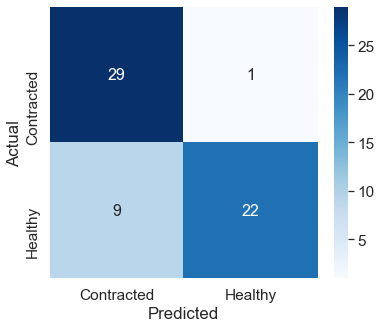

In [42]:
class_names = ["Contracted","Healthy"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [18]:
# naive bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_hat = nb.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for Naive Bayes model: {}".format(accscore))
print("F1 score for Naive Bayes model: {}".format(f1score))
print("ROC AUC score for Naive Bayes model: {}".format(rocscore))

Accuracy score for Naive Bayes model: 0.5081967213114754
F1 score for Naive Bayes model: 0.0
ROC AUC score for Naive Bayes model: 0.5


In [21]:
# random forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for Random Forest Classifier model: {}".format(accscore))
print("F1 score for Random Forest Classifier model: {}".format(f1score))
print("ROC AUC score for Random Forest Classifier model: {}".format(rocscore))

Accuracy score for Random Forest Classifier model: 0.8688524590163934
F1 score for Random Forest Classifier model: 0.8749999999999999
ROC AUC score for Random Forest Classifier model: 0.8698924731182796


Text(0.5, 0, 'Relative Importance')

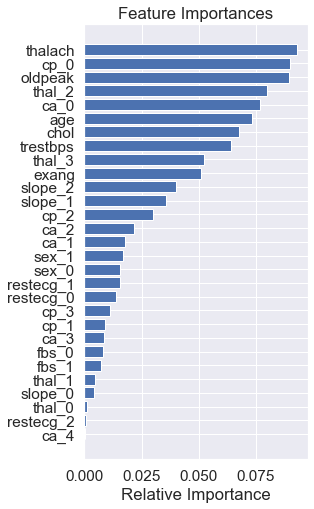

In [72]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(4,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [24]:
# decision tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for Decision Tree Classifier model: {}".format(accscore))
print("F1 score for Decision Tree Classifier model: {}".format(f1score))
print("ROC AUC score for Decision Tree Classifier model: {}".format(rocscore))

Accuracy score for Decision Tree Classifier model: 0.7377049180327869
F1 score for Decision Tree Classifier model: 0.7419354838709677
ROC AUC score for Decision Tree Classifier model: 0.7381720430107528


Text(0.5, 1, 'Decision Tree Model')

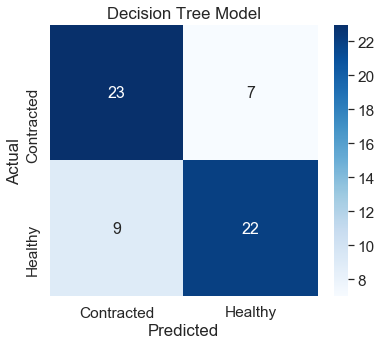

In [74]:
class_names = ["Contracted","Healthy"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})
plt.title('Decision Tree Model')

In [27]:
# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for k-Neighbors Classifier model: {}".format(accscore))
print("F1 score for k-Neighbors Classifier model: {}".format(f1score))
print("ROC AUC score for k-Neighbors Classifier model: {}".format(rocscore))

Accuracy score for k-Neighbors Classifier model: 0.8852459016393442
F1 score for k-Neighbors Classifier model: 0.8923076923076922
ROC AUC score for k-Neighbors Classifier model: 0.8865591397849462


Text(0.5, 1, 'kNN Model')

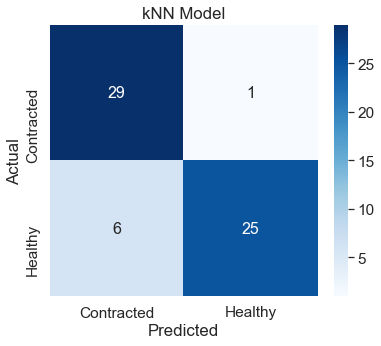

In [76]:
class_names = ["Contracted","Healthy"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})
plt.title('kNN Model')

In [30]:
# Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for SVC Classifier model: {}".format(accscore))
print("F1 score for SVC Classifier model: {}".format(f1score))
print("ROC AUC score for SVC Classifier model: {}".format(rocscore))

Accuracy score for SVC Classifier model: 0.8360655737704918
F1 score for SVC Classifier model: 0.8529411764705883
ROC AUC score for SVC Classifier model: 0.8381720430107527


### hyperparameters tuning for best model

In [33]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_params = {
    'algorithm': ['auto', 'Brute', 'Ball', 'K-D'],
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [0,1,2,3],
    'leaf_size': [20,30,40]
}

gs = GridSearchCV(knn, 
                  grid_params,
                  verbose=1,
                  cv=5,
                  n_jobs=-1
                 )

gsresults = gs.fit(X_train, y_train)
y_hat = gsresults.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for tuned k-Neighbors Classifier model: {}".format(accscore))
print("F1 score for tuned k-Neighbors Classifier model: {}".format(f1score))
print("ROC AUC score for tuned k-Neighbors Classifier model: {}".format(rocscore))

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s


Accuracy score for tuned k-Neighbors Classifier model: 0.8524590163934426
F1 score for tuned k-Neighbors Classifier model: 0.8656716417910447
ROC AUC score for tuned k-Neighbors Classifier model: 0.8543010752688173


[Parallel(n_jobs=-1)]: Done 7791 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:    4.1s finished


In [55]:
gs.

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'Brute', 'Ball', 'K-D'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 19], 'p': [0, 1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)>

In [35]:
# NCA classification

In [36]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline

In [127]:
nca = NeighborhoodComponentsAnalysis(random_state=101)
ncapipe = Pipeline([('nca',nca),('knn',knn)])

ncaresults = ncapipe.fit(X_train, y_train)
y_hat = ncaresults.predict(X_test)
accscore = accuracy_score(y_test, y_hat)
f1score = f1_score(y_test, y_hat)
rocscore = roc_auc_score(y_test, y_hat)
print("Accuracy score for tuned k-Neighbors Classifier model: {}".format(accscore))
print("F1 score for tuned k-Neighbors Classifier model: {}".format(f1score))
print("ROC AUC score for tuned k-Neighbors Classifier model: {}".format(rocscore))

Accuracy score for tuned k-Neighbors Classifier model: 0.7868852459016393
F1 score for tuned k-Neighbors Classifier model: 0.8059701492537312
ROC AUC score for tuned k-Neighbors Classifier model: 0.7887096774193548
